# pandas

## pandas 数据结构

### Sereis
Sereies是一个1维的数据结构，由一组数据和一组index组成。

pd.Series(data, index=index)

其中的data可以是：
+ python 字典
+ ndarray
+ 标量值scalar

index可以自己给定，否则可能是根据字典中的key来决定。

#### From ndarray

In [1]:
import numpy as np
import pandas as pd

s = pd.Series(np.random.randn(5))
s

0   -0.743114
1   -0.146402
2   -0.912769
3    0.502942
4   -1.836015
dtype: float64

In [2]:
# 给定index
s = pd.Series(np.random.randn(5), index=['a','b','a','b','v'])
s

a    0.918537
b    0.242924
a    0.263255
b   -0.320314
v    0.293940
dtype: float64

In [3]:
s['a']

a    0.918537
a    0.263255
dtype: float64

In [4]:
s.index

Index([u'a', u'b', u'a', u'b', u'v'], dtype='object')

In [5]:
s.values

array([ 0.91853677,  0.24292371,  0.26325512, -0.32031408,  0.29394009])

In [7]:
s.value_counts() # counts每一个值出现的次数

 0.293940    1
-0.320314    1
 0.918537    1
 0.263255    1
 0.242924    1
dtype: int64

#### From dict
从字典中生成，index指定时会与字典中的key去做对应。

In [10]:
d = {'first':12, 'second':34, 'third':5656}
pd.Series(d)

first       12
second      34
third     5656
dtype: int64

In [11]:
pd.Series(d, index=['first','third','eric']) # index中的无法·与key对应上的，就被改为NaN

first      12.0
third    5656.0
eric        NaN
dtype: float64

#### From scalar

In [12]:
pd.Series(5, index=['a','b','c']) # 根据index个数来rep

a    5
b    5
c    5
dtype: int64

In [15]:
pd.Series([1,2,3,4],index=['a','b','v','sd'])

a     1
b     2
v     3
sd    4
dtype: int64

#### Series is ndarray-like
可以想ndarray一样进行操作，同时它在slice的时候也是copy操作，因此：赋值会在原先的数据层面上进行更改哦。

In [16]:
s

a    0.918537
b    0.242924
a    0.263255
b   -0.320314
v    0.293940
dtype: float64

In [17]:
s['b']

b    0.242924
b   -0.320314
dtype: float64

In [18]:
s[0]

0.9185367699103385

In [19]:
s[:3]

a    0.918537
b    0.242924
a    0.263255
dtype: float64

In [20]:
# 花式索引
s[[4,3,1]]

v    0.293940
b   -0.320314
b    0.242924
dtype: float64

In [22]:
s[['b','v']]

b    0.242924
b   -0.320314
v    0.293940
dtype: float64

In [21]:
# 不是copy
s[0] = 10000 # 会直接在原数据上进行更改
s

a    10000.000000
b        0.242924
a        0.263255
b       -0.320314
v        0.293940
dtype: float64

#### Series is dict-like
Series也拥有dict的一些优秀性质

In [23]:
s

a    10000.000000
b        0.242924
a        0.263255
b       -0.320314
v        0.293940
dtype: float64

In [24]:
s['a']

a    10000.000000
a        0.263255
dtype: float64

In [25]:
'a' in s

True

In [31]:
# a['f'] 不存在那个index的时候会报错
print s.get('f', '么有')

么有


#### 向量化操作，以及Series的对齐

In [33]:
s ** 2

a    1.000000e+08
b    5.901193e-02
a    6.930326e-02
b    1.026011e-01
v    8.640078e-02
dtype: float64

In [34]:
s[1: ] + s[:-1]

a    10000.263255
a        0.526510
b        0.485847
b       -0.077390
b       -0.077390
b       -0.640628
v             NaN
dtype: float64

In [37]:
pd.isnull(s[1: ] + s[:-1])

a    False
a    False
b    False
b    False
b    False
b    False
v     True
dtype: bool

#### name属性
每一个Series可以有一个name属性

In [39]:
s = pd.Series(np.random.randn(5), name='population');s

0    0.042252
1   -1.292982
2    0.848892
3    0.860238
4   -1.188350
Name: population, dtype: float64

In [40]:
s.index.name = 'State'

In [41]:
s

State
0    0.042252
1   -1.292982
2    0.848892
3    0.860238
4   -1.188350
Name: population, dtype: float64

In [42]:
s.index = ['Anhui','Shanghai','Beijing','Fujian','Guangdong'];s

anhui        0.042252
shanghai    -1.292982
Beijing      0.848892
Fujian       0.860238
Guangdong   -1.188350
Name: population, dtype: float64

### DataFrame数据框
每一列可以是不同的数据类型;可以由以下形式的数据生成:
+ dict of lists,dicts,Series or ndarray
+ 2D ndarray
+ 结构化数组
+ Series
+ 另外一个DataFrame

#### From dict of Series or dicts


In [49]:
d = {'one':pd.Series([1,2,3], index=['a','b','c']),
    'two':pd.Series(np.random.randn(4), index=['a','b','c','d'])}
pd.DataFrame(d)

,one,two
a,1.0,0.012386
b,2.0,-0.465532
c,3.0,-0.684686
d,NaN,-0.025334


In [50]:
pd.DataFrame(d, index=['a','b','e'])

,one,two
a,1.0,0.012386
b,2.0,-0.465532
e,NaN,NaN


In [51]:
pd.DataFrame(d, index=['a','b','c'], columns=['one','three'])
# 以d为参考，对应不上的就会是NaN

,one,three
a,1,NaN
b,2,NaN
c,3,NaN


In [52]:
df = pd.DataFrame(d)
df['one']  # 取一列时产生的是一个Series,同时直接把name给设置好了

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [54]:
type(df['one'])

pandas.core.series.Series

In [61]:
# 按行选取同样变为了一个Series,就是说类似R里面的simplify都变为True了
print df.loc['a']  # 代替了df.ix
print type(df.loc['a'])

one    1.000000
two    0.012386
Name: a, dtype: float64
<class 'pandas.core.series.Series'>


#### From dict of list/ndarray


In [62]:
d = {'one':[1,2,3,4],
    'two':[3,4,5,2]}
pd.DataFrame(d)

,one,two
0,1,3
1,2,4
2,3,5
3,4,2


In [63]:
pd.DataFrame(d, index=['eric','harden','yy','as'])

,one,two
eric,1,3
harden,2,4
yy,3,5
as,4,2


#### From 结构化数组

In [64]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'), ('C', 'a10')])
data

array([(0,  0., ''), (0,  0., '')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [65]:
data[:] = [(1,2.,'Hello'),(2,3.,'World')]
pd.DataFrame(data)

,A,B,C
0,1,2.0,Hello
1,2,3.0,World


#### From a list of dicts

In [66]:
data2 = [{'a':1, 'b':2, 'c':34}, {'a':23,'b':342}]
pd.DataFrame(data2)

,a,b,c
0,1,2,34.0
1,23,342,NaN


#### From a dict of tuples

In [67]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ....:               ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ....:               ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ....:               ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ....:               ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})
   ....: 

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### 可选的构造函数

+ DataFrame.From_dict
+ DataFrame.from_records
从结构化数组中产生一个DF，但最后一个参数index可以指定哪一个fields作为index

In [73]:
data

array([(1,  2., 'Hello'), (2,  3., 'World')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [74]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
Hello,1,2.0
World,2,3.0


+ DataFrame.from_items

In [75]:
pd.DataFrame.from_items([('A',[1,2,3]), ('B',[4,3,2])])

,A,B
0,1,4
1,2,3
2,3,2


In [77]:
# 使用orient将keys作为行的label
pd.DataFrame.from_items([('A',[1,2,3]), ('B',[4,3,2])], orient='index', columns=['one','two','three'])

,one,two,three
A,1,2,3
B,4,3,2


#### 列操作：新建与删除，选取

In [78]:
df

,one,two
a,1.0,0.012386
b,2.0,-0.465532
c,3.0,-0.684686
d,NaN,-0.025334


In [80]:
df['three'] = range(4)
df

,one,two,three
a,1.0,0.012386,0
b,2.0,-0.465532,1
c,3.0,-0.684686,2
d,NaN,-0.025334,3


In [82]:
# 想要删除某一列时
del df['three']
df

,one,two
a,1.0,0.012386
b,2.0,-0.465532
c,3.0,-0.684686
d,NaN,-0.025334


In [85]:
df['flag'] = df['one'] + df['two']
df

,one,two,flag
a,1.0,0.012386,1.012386
b,2.0,-0.465532,1.534468
c,3.0,-0.684686,2.315314
d,NaN,-0.025334,NaN


In [86]:
# 或者使用pop来删除
df.pop('flag')

a    1.012386
b    1.534468
c    2.315314
d         NaN
Name: flag, dtype: float64

In [87]:
df

,one,two
a,1.0,0.012386
b,2.0,-0.465532
c,3.0,-0.684686
d,NaN,-0.025334


#### 列的赋值：Method chain
类似于R中dplyr中的mutate函数，可以根据已有的列去生成一列新的列。

**注意**:assign一直都是对原数据进行copy，所以不会使得原来的数据发生改变

In [88]:
iris = pd.read_csv('/Users/yanghao/Documents/iris.csv')

In [89]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [90]:
del iris['Unnamed: 0']
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
iris.assign(sepal_ratio=iris['Sepal.Length']/iris['Sepal.Width']).head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


In [96]:
iris.assign(sepal_ratio = lambda x:x['Sepal.Length']/x['Sepal.Width']).head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


In [108]:
iris.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Species']
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


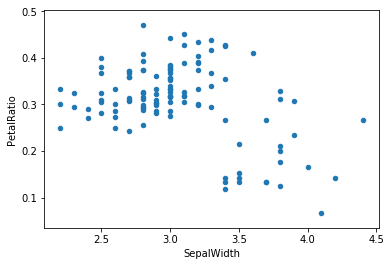

In [125]:
%matplotlib inline
(iris.query("SepalLength > 5")
     .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
             PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
     .plot(kind='scatter', x='SepalWidth', y='PetalRatio'))
# 一行太长的话，用括号将所有的代码括起来

In [126]:
# 这里的.assign函数是先对每一个函数计算，再assign，因此不能一起定义，最后递进地定义
#(df.assign(C = lambda x: x['A'] + x['B'])
          # .assign(D = lambda x: x['A'] + x['C']))

#### 数据框的对齐与计算
两个数据框之间操作的时候，会按照column对它进行并集操作

In [133]:
df = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2 = pd.DataFrame(np.random.randn(7,3), columns=['A','B','C'])
df

,A,B,C,D
0,-1.481135,0.695823,-1.443906,1.900794
1,0.624742,0.976804,-1.361205,-0.275201
2,0.638288,1.332779,-0.056160,-0.335978
3,-0.335388,-0.810779,0.300927,0.148718
4,-0.682700,-1.452932,1.402812,-1.674881
5,-0.131625,-0.150444,0.402558,0.717925
6,-1.298051,-0.595096,0.115357,0.999499
7,-0.890089,-0.793908,0.189350,-0.364150
8,-0.678018,0.614027,0.518486,-0.326940
9,-0.050398,-0.064148,-0.140711,0.285078


In [128]:
df2

,A,B,C
0,-1.230270,-2.118638,1.464424
1,-1.216326,1.648401,0.760623
2,0.135430,1.022920,-0.948868
3,0.250129,-0.319019,0.235577
4,0.706240,-0.479373,0.111603
5,-1.066457,-1.056950,0.356688
6,0.566360,-2.626521,1.986772


In [129]:
df + df2 # 取并集

,A,B,C,D
0,-1.116797,-0.729364,1.509533,NaN
1,-0.698786,2.750691,0.335967,NaN
2,-0.368013,0.656401,-2.046912,NaN
3,1.207251,-1.139015,1.118995,NaN
4,0.373714,-0.448203,0.430902,NaN
5,-1.754099,-1.400675,0.285687,NaN
6,-0.300555,-2.351806,2.718974,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


##### DataFrame与Series之间进行操作
当这二者进行操作时，默认的是将Series按行广播到DataFrame上去；
但时序数据中，如何按列广播呢? df.sub(df['A'], axis=0)

In [137]:
df - df.iloc[0] # 按行广播

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,2.105877,0.280981,0.082701,-2.175995
2,2.119423,0.636956,1.387746,-2.236771
3,1.145747,-1.506602,1.744833,-1.752076
4,0.798435,-2.148755,2.846718,-3.575675
5,1.349510,-0.846267,1.846465,-1.182869
6,0.183084,-1.290919,1.559263,-0.901294
7,0.591046,-1.489731,1.633256,-2.264944
8,0.803117,-0.081796,1.962392,-2.227734
9,1.430737,-0.759971,1.303196,-1.615716


In [138]:
# 当对应的是时序数据，按列广播
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8,3), index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,0.211680,-0.952942,-0.743552
2000-01-02,-1.576124,0.200406,0.852989
2000-01-03,-1.624712,2.625652,0.508113
2000-01-04,0.656347,0.689628,-0.960090
2000-01-05,0.128176,-1.331587,0.468116
2000-01-06,-0.576480,0.649999,-0.598029
2000-01-07,-1.011750,-0.520439,0.474570
2000-01-08,0.033660,-0.680799,-0.186802


In [139]:
df - df.iloc[0]

,A,B,C
2000-01-01,0.000000,0.000000,0.000000
2000-01-02,-1.787803,1.153348,1.596541
2000-01-03,-1.836392,3.578594,1.251665
2000-01-04,0.444667,1.642570,-0.216538
2000-01-05,-0.083504,-0.378646,1.211667
2000-01-06,-0.788160,1.602940,0.145523
2000-01-07,-1.223429,0.432503,1.218121
2000-01-08,-0.178020,0.272143,0.556749


In [142]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,-1.164621,-0.955231
2000-01-02,0.0,1.776530,2.429113
2000-01-03,0.0,4.250364,2.132825
2000-01-04,0.0,0.033281,-1.616437
2000-01-05,0.0,-1.459763,0.339940
2000-01-06,0.0,1.226479,-0.021549
2000-01-07,0.0,0.491311,1.486320
2000-01-08,0.0,-0.714459,-0.220462


In [144]:
df * 100

,A,B,C
2000-01-01,21.167951,-95.294174,-74.355163
2000-01-02,-157.612364,20.040644,85.298934
2000-01-03,-162.471199,262.565245,50.811295
2000-01-04,65.634679,68.962789,-96.008981
2000-01-05,12.817587,-133.158725,46.811579
2000-01-06,-57.648036,64.999874,-59.802908
2000-01-07,-101.174989,-52.043879,47.456978
2000-01-08,3.365958,-68.079898,-18.680248


#### 转置、NUmpy函数

In [145]:
df.T

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00
A,0.211680,-1.576124,-1.624712,0.656347,0.128176,-0.576480,-1.011750,0.033660
B,-0.952942,0.200406,2.625652,0.689628,-1.331587,0.649999,-0.520439,-0.680799
C,-0.743552,0.852989,0.508113,-0.960090,0.468116,-0.598029,0.474570,-0.186802


In [146]:
np.exp(df)

,A,B,C
2000-01-01,1.235752,0.385605,0.475422
2000-01-02,0.206775,1.221899,2.346651
2000-01-03,0.196968,13.813584,1.662152
2000-01-04,1.927737,1.992974,0.382858
2000-01-05,1.136753,0.264058,1.596982
2000-01-06,0.561872,1.915538,0.549894
2000-01-07,0.363582,0.594260,1.607323
2000-01-08,1.034232,0.506212,0.829608


In [147]:
np.asarray(df)

array([[ 0.21167951, -0.95294174, -0.74355163],
       [-1.57612364,  0.20040644,  0.85298934],
       [-1.62471199,  2.62565245,  0.50811295],
       [ 0.65634679,  0.68962789, -0.96008981],
       [ 0.12817587, -1.33158725,  0.46811579],
       [-0.57648036,  0.64999874, -0.59802908],
       [-1.01174989, -0.52043879,  0.47456978],
       [ 0.03365958, -0.68079898, -0.18680248]])

In [149]:
df.dot(df.T).head()

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00
2000-01-01,1.505775,-1.158850,-3.223820,0.195636,0.947989,-0.296775,-0.071086,0.794784
2000-01-02,-1.158850,3.251919,3.520360,-1.715224,-0.069582,0.528756,1.895147,-0.348829
2000-01-03,-3.223820,3.520360,9.791919,0.256515,-3.466678,2.339419,0.518446,-1.937145
2000-01-04,0.195636,-1.715224,0.256515,1.828150,-1.283605,0.644048,-1.478598,-0.268058
2000-01-05,0.947989,-0.069582,-3.466678,-1.283605,2.008686,-1.219368,0.785481,0.823412


#### Console display 输出信息
+ .info()：类似于glimpse

In [150]:
print iris

     SepalLength  SepalWidth  PetalLength  PetalWidth    Species
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
5            5.4         3.9          1.7         0.4     setosa
6            4.6         3.4          1.4         0.3     setosa
7            5.0         3.4          1.5         0.2     setosa
8            4.4         2.9          1.4         0.2     setosa
9            4.9         3.1          1.5         0.1     setosa
10           5.4         3.7          1.5         0.2     setosa
11           4.8         3.4          1.6         0.2     setosa
12           4.8         3.0          1.4         0.1     setosa
13           4.3         3.0          1.1         0.1     setosa
14           5.8         

In [151]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [157]:
print iris.iloc[:4,:].to_string()

   SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa


### Panel ： 教程中建议转向学习xarray包。

## 基础函数操作


In [2]:
import numpy as np
import pandas as pd
index = pd.date_range('1/1/2000', periods=8)
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
df = pd.DataFrame(np.random.randn(8, 3), index=index,
                  columns=['A', 'B', 'C'])
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],
              major_axis=pd.date_range('1/1/2000', periods=5),
              minor_axis=['A', 'B', 'C', 'D'])

### Head，Tail

In [3]:
df.head(n=5)

,A,B,C
2000-01-01,1.461910,-0.877896,-0.813601
2000-01-02,1.946574,-0.758587,-0.193568
2000-01-03,0.179584,1.468319,-1.064704
2000-01-04,-1.475221,-0.907287,2.150201
2000-01-05,1.335433,-0.138100,1.344368


In [4]:
longSeries = pd.Series(np.random.randn(1000))
longSeries.head(n=5)

0    0.002974
1   -0.492302
2   -0.299441
3    0.316330
4    0.432789
dtype: float64

In [5]:
longSeries.tail(n=5)

995   -0.293304
996   -0.237664
997   -0.244100
998    1.429413
999   -0.138234
dtype: float64

### Attributes and the raw ndarray
pd下的许多属性可以使得你访问许多metaData
+ shape
+ index.columns
+ values:看raw data
这些属性都可以被赋值

In [6]:
df.columns

Index([u'A', u'B', u'C'], dtype='object')

In [7]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,1.461910,-0.877896,-0.813601
2000-01-02,1.946574,-0.758587,-0.193568
2000-01-03,0.179584,1.468319,-1.064704
2000-01-04,-1.475221,-0.907287,2.150201
2000-01-05,1.335433,-0.138100,1.344368
2000-01-06,-0.426896,-0.352148,-0.461342
2000-01-07,-0.018046,-0.633494,0.818858
2000-01-08,1.053381,-0.148270,-0.415116


In [8]:
df.values

array([[ 1.46190957, -0.877896  , -0.81360115],
       [ 1.94657438, -0.75858726, -0.19356817],
       [ 0.17958378,  1.4683191 , -1.06470355],
       [-1.47522105, -0.90728727,  2.15020086],
       [ 1.33543291, -0.13810011,  1.3443676 ],
       [-0.42689557, -0.35214814, -0.46134162],
       [-0.01804594, -0.63349441,  0.81885771],
       [ 1.05338123, -0.1482701 , -0.41511607]])

### Matching/broadcasting behavior


In [21]:
df

,a,b,c
2000-01-01,1.461910,-0.877896,-0.813601
2000-01-02,1.946574,-0.758587,-0.193568
2000-01-03,0.179584,1.468319,-1.064704
2000-01-04,-1.475221,-0.907287,2.150201
2000-01-05,1.335433,-0.138100,1.344368
2000-01-06,-0.426896,-0.352148,-0.461342
2000-01-07,-0.018046,-0.633494,0.818858
2000-01-08,1.053381,-0.148270,-0.415116


In [23]:
  # 行
row = df.iloc[0]
# 列
column = df['a']

In [24]:
df.sub(row,axis='columns')

,a,b,c
2000-01-01,0.000000,0.000000,0.000000
2000-01-02,0.484665,0.119309,0.620033
2000-01-03,-1.282326,2.346215,-0.251102
2000-01-04,-2.937131,-0.029391,2.963802
2000-01-05,-0.126477,0.739796,2.157969
2000-01-06,-1.888805,0.525748,0.352260
2000-01-07,-1.479956,0.244402,1.632459
2000-01-08,-0.408528,0.729626,0.398485


In [25]:
df.sub(row,axis=1)

,a,b,c
2000-01-01,0.000000,0.000000,0.000000
2000-01-02,0.484665,0.119309,0.620033
2000-01-03,-1.282326,2.346215,-0.251102
2000-01-04,-2.937131,-0.029391,2.963802
2000-01-05,-0.126477,0.739796,2.157969
2000-01-06,-1.888805,0.525748,0.352260
2000-01-07,-1.479956,0.244402,1.632459
2000-01-08,-0.408528,0.729626,0.398485


In [26]:
df.sub(column, axis='index') # 列操作

,a,b,c
2000-01-01,0.0,-2.339806,-2.275511
2000-01-02,0.0,-2.705162,-2.140143
2000-01-03,0.0,1.288735,-1.244287
2000-01-04,0.0,0.567934,3.625422
2000-01-05,0.0,-1.473533,0.008935
2000-01-06,0.0,0.074747,-0.034446
2000-01-07,0.0,-0.615448,0.836904
2000-01-08,0.0,-1.201651,-1.468497


In [27]:
df.sub(column, axis=0)

,a,b,c
2000-01-01,0.0,-2.339806,-2.275511
2000-01-02,0.0,-2.705162,-2.140143
2000-01-03,0.0,1.288735,-1.244287
2000-01-04,0.0,0.567934,3.625422
2000-01-05,0.0,-1.473533,0.008935
2000-01-06,0.0,0.074747,-0.034446
2000-01-07,0.0,-0.615448,0.836904
2000-01-08,0.0,-1.201651,-1.468497


### 缺失值操作
在进行基础操作时，若出现Nan，可以考虑使用别的值来fill

In [43]:
df2 = df.copy()
df2.ix[0,1:3] = np.nan
df2

/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,a,b,c
2000-01-01,1.461910,NaN,NaN
2000-01-02,1.946574,-0.758587,-0.193568
2000-01-03,0.179584,1.468319,-1.064704
2000-01-04,-1.475221,-0.907287,2.150201
2000-01-05,1.335433,-0.138100,1.344368
2000-01-06,-0.426896,-0.352148,-0.461342
2000-01-07,-0.018046,-0.633494,0.818858
2000-01-08,1.053381,-0.148270,-0.415116


In [44]:
df  + df2

,a,b,c
2000-01-01,2.923819,NaN,NaN
2000-01-02,3.893149,-1.517175,-0.387136
2000-01-03,0.359168,2.936638,-2.129407
2000-01-04,-2.950442,-1.814575,4.300402
2000-01-05,2.670866,-0.276200,2.688735
2000-01-06,-0.853791,-0.704296,-0.922683
2000-01-07,-0.036092,-1.266989,1.637715
2000-01-08,2.106762,-0.296540,-0.830232


In [45]:
df.add(df2,fill_value=10000)

,a,b,c
2000-01-01,2.923819,9999.122104,9999.186399
2000-01-02,3.893149,-1.517175,-0.387136
2000-01-03,0.359168,2.936638,-2.129407
2000-01-04,-2.950442,-1.814575,4.300402
2000-01-05,2.670866,-0.276200,2.688735
2000-01-06,-0.853791,-0.704296,-0.922683
2000-01-07,-0.036092,-1.266989,1.637715
2000-01-08,2.106762,-0.296540,-0.830232


In [46]:
df.gt(df2)

,a,b,c
2000-01-01,False,False,False
2000-01-02,False,False,False
2000-01-03,False,False,False
2000-01-04,False,False,False
2000-01-05,False,False,False
2000-01-06,False,False,False
2000-01-07,False,False,False
2000-01-08,False,False,False


In [49]:
(df > 0).all()

a    False
b    False
c    False
dtype: bool

In [51]:
df.empty

False

### 比较两个object是否相同
这里需要注意的是,nan值互相比较时，并不返回True

In [52]:
np.nan == np.nan # 二者比较居然不相等！

False

In [53]:
(df + df).equals(df * 2)

True

In [54]:
pd.Series

pandas.core.series.Series

In [56]:
pd.Index(['a','v'])

Index([u'a', u'v'], dtype='object')

In [62]:
pd.read_csv??